In [126]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Join DataFramer 

In [127]:
data_1 = {
        'id': ['1', '2', '3', '4', '5'],
        'primer_nombre': ['Alex', 'Amy', 'Valentina', 'Alice', 'Lina'], 
        'apellido': ['Anderson', 'Ruales', 'Marin', 'Barbosa', 'Robles']}

data_2 = {
        'id': ['4', '5', '6', '7', '8'],
        'primer_nombre': ['Luis', 'Brian', 'Mariana', 'Marcela', 'Carlos'], 
        'apellido': ['Ruiz', 'Giralgo', 'Ortegon', 'Palacios', 'Gallego']}

data_3 = {
        'id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

In [128]:
#crear 3 dataframes con los datos anteriores y asignarlos a 3 variables.
df1 = pd.DataFrame(data_1, columns = ['id', 'primer_nombre', 'apellido'])
df2 = pd.DataFrame(data_2, columns = ['id', 'primer_nombre', 'apellido'])
df3 = pd.DataFrame(data_3, columns = ['id', 'test_id'])

In [129]:
#unir 2 dataframes a lo largo de filas y asignar todos los datos
df_row = pd.concat([df1, df2])
print(df_row)

  id primer_nombre  apellido
0  1          Alex  Anderson
1  2           Amy    Ruales
2  3     Valentina     Marin
3  4         Alice   Barbosa
4  5          Lina    Robles
0  4          Luis      Ruiz
1  5         Brian   Giralgo
2  6       Mariana   Ortegon
3  7       Marcela  Palacios
4  8        Carlos   Gallego


In [130]:
#Unir 2 dataframes a lo largo de columnas y asignar todos los datos de las columnas
df_col = pd.concat([df1, df2], axis=1)
print(df_col)

  id primer_nombre  apellido id primer_nombre  apellido
0  1          Alex  Anderson  4          Luis      Ruiz
1  2           Amy    Ruales  5         Brian   Giralgo
2  3     Valentina     Marin  6       Mariana   Ortegon
3  4         Alice   Barbosa  7       Marcela  Palacios
4  5          Lina    Robles  8        Carlos   Gallego


In [131]:
#hacer un merge para todos los datos y el tercer dataframe con el valor id
df_merge_col = pd.merge(df_row, df3, on='id')
print(df_merge_col)

  id primer_nombre  apellido  test_id
0  1          Alex  Anderson       51
1  2           Amy    Ruales       15
2  3     Valentina     Marin       15
3  4         Alice   Barbosa       61
4  4          Luis      Ruiz       61
5  5          Lina    Robles       16
6  5         Brian   Giralgo       16
7  7       Marcela  Palacios       14
8  8        Carlos   Gallego       15


In [132]:
merged_df = pd.merge(pd.merge(df1, df2, on='id'), df3, on='id')
merged_df

id primer_nombre_x apellido_x primer_nombre_y apellido_y  test_id
0  4           Alice    Barbosa            Luis       Ruiz       61
1  5            Lina     Robles           Brian    Giralgo       16

### GroupBy

In [133]:
#cargamos los datos
data = 'https://gitlab.com/udea3/cursofci-2023-2/-/raw/main/Documentos/Data/datos_alcohol.txt?ref_type=heads'
df = pd.read_csv(data)

In [134]:
df.head()

pais  porciones_cerveza  porciones_licor  porciones_vino  \
0  Afghanistan                  0                0               0   
1      Albania                 89              132              54   
2      Algeria                 25                0              14   
3      Andorra                245              138             312   
4       Angola                217               57              45   

   litros_totales_de_alcohol_puro continente  
0                             0.0         AS  
1                             4.9         EU  
2                             0.7         AF  
3                            12.4         EU  
4                             5.9         AF

In [135]:
#Que continente tomas mas cerveza en promedio?

print("El continente que toma mas cerveza en promedio es: ")
print(df.groupby('continente').porciones_cerveza.mean().idxmax())

El continente que toma mas cerveza en promedio es: 
EU


In [136]:
#Analizar la columna de vino y encontrar e imprimir un análisis básico estadístico del consumo 
#de vino por continente (media, mediana, desviación estándar y varianza)

print("Analisis basico estadistico del consumo de vino por continente:")
print()
print(df.groupby('continente').porciones_vino.describe())

Analisis basico estadistico del consumo de vino por continente:

            count        mean        std  min   25%    50%     75%    max
continente                                                               
AF           53.0   16.264151  38.846419  0.0   1.0    2.0   13.00  233.0
AS           44.0    9.068182  21.667034  0.0   0.0    1.0    8.00  123.0
EU           45.0  142.222222  97.421738  0.0  59.0  128.0  195.00  370.0
OC           16.0   35.625000  64.555790  0.0   1.0    8.5   23.25  212.0
SA           12.0   62.416667  88.620189  1.0   3.0   12.0   98.50  221.0


In [137]:
#Para cada continente imprime los valroes medio, mínimo y máximo de consumo de alcohol
print("Valores medio, minimo y maximo de consumo de alcohol por continente")
print()
print(df.groupby('continente').agg({'porciones_licor': ['mean', 'min', 'max']}))


Valores medio, minimo y maximo de consumo de alcohol por continente

           porciones_licor         
                      mean min  max
continente                         
AF               16.339623   0  152
AS               60.840909   0  326
EU              132.555556   0  373
OC               58.437500   0  254
SA              114.750000  25  302


In [138]:
#para cada continente imprime el consumo medio de alcohol para todas las columnas
print("Consumo medio de alcohol por continente")
print()

#ignoramos la columna pais 
df.drop('pais', axis=1).groupby('continente').mean()

Consumo medio de alcohol por continente



porciones_cerveza  porciones_licor  porciones_vino  \
continente                                                       
AF                  61.471698        16.339623       16.264151   
AS                  37.045455        60.840909        9.068182   
EU                 193.777778       132.555556      142.222222   
OC                  89.687500        58.437500       35.625000   
SA                 175.083333       114.750000       62.416667   

            litros_totales_de_alcohol_puro  
continente                                  
AF                                3.007547  
AS                                2.170455  
EU                                8.617778  
OC                                3.381250  
SA                                6.308333

### Visualización

In [139]:
#Cargamos los datos 
data = 'https://gitlab.com/udea3/cursofci-2023-2/-/raw/main/Documentos/Data/visualizacion.txt?ref_type=heads'
df = pd.read_csv(data)

In [140]:
#eliminar la columna de Unnamed: 0
df.drop('Unnamed: 0', axis=1, inplace=True)

In [141]:
#Ralizar el histograma de la columna total_bill

df.total_bill.hist()
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

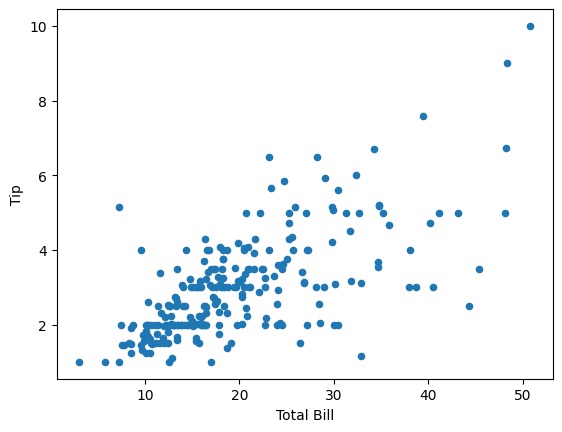

In [142]:
#crear un scatter plot presentando la relacion entre total_bill y tip

df.plot.scatter(x='total_bill', y='tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

Relacion entre los valores de los days y total_bill



<Axes: title={'center': 'total_bill'}, xlabel='day'>

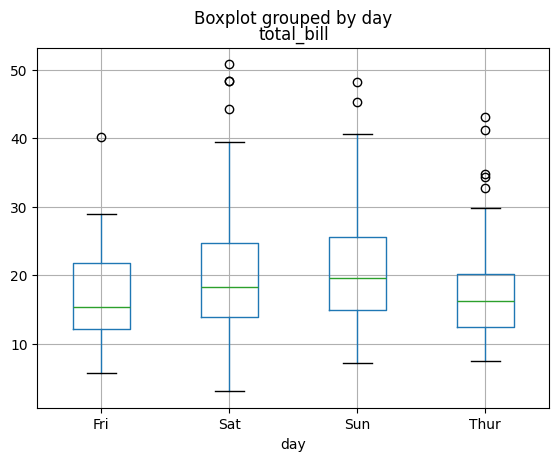

In [143]:
#Presentar una relacion entre los valores de los days y total_bill
print("Relacion entre los valores de los days y total_bill")
print()

df.boxplot(column='total_bill', by='day')

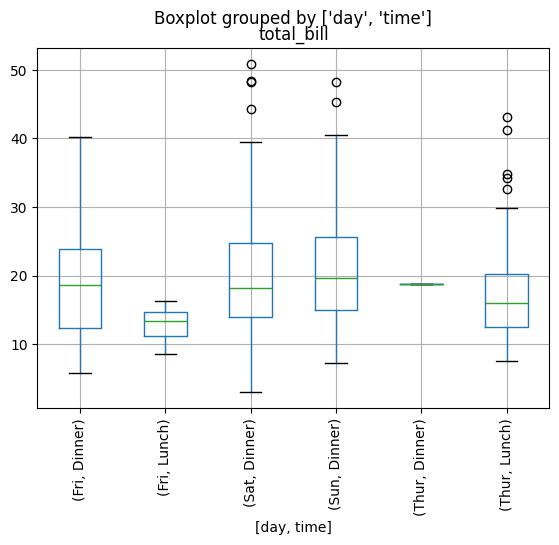

In [144]:
#crear un box plot que presente el total_bill por dia diferenciando la hora (cena o Almuerzo)

df.boxplot(column='total_bill', by=['day', 'time'])

#rotamos los labels de los ejes x e y
plt.xticks(rotation=90)
plt.show()